In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [67]:
filePath = '/Users/yufanwang/Desktop/Study/Project/models/tensorboard'
files = sorted(os.listdir(filePath))
files.remove('.DS_Store')
files.remove('smooth')
files

['run-GramAdv-tag-dev_bleu.csv',
 'run-GramAdv-tag-train_loss.csv',
 'run-GramAdvMean-tag-dev_bleu.csv',
 'run-GramAdvMean-tag-train_loss.csv',
 'run-Gramformer-tag-dev_bleu.csv',
 'run-Gramformer-tag-train_loss.csv']

In [68]:
out_former = pd.read_csv(filePath+'/'+files[-1])
out_former[['Step',"Value"]].head()

,Step,Value
0,2000,0.648475
1,3000,0.291479
2,4000,0.281116
3,5000,0.277071
4,6000,0.269363


In [69]:
adv = pd.read_csv(filePath+'/'+files[1])
adv["Value"] = adv["Value"]
adv[['Step',"Value"]].head()

,Step,Value
0,2000,0.689396
1,3000,0.381259
2,4000,0.406072
3,5000,0.426603
4,6000,0.452683


In [70]:
mean = pd.read_csv(filePath+'/'+files[3])
mean[['Step',"Value"]].head()

,Step,Value
0,2000,0.647622
1,3000,0.291224
2,4000,0.281564
3,5000,0.277126
4,6000,0.269344


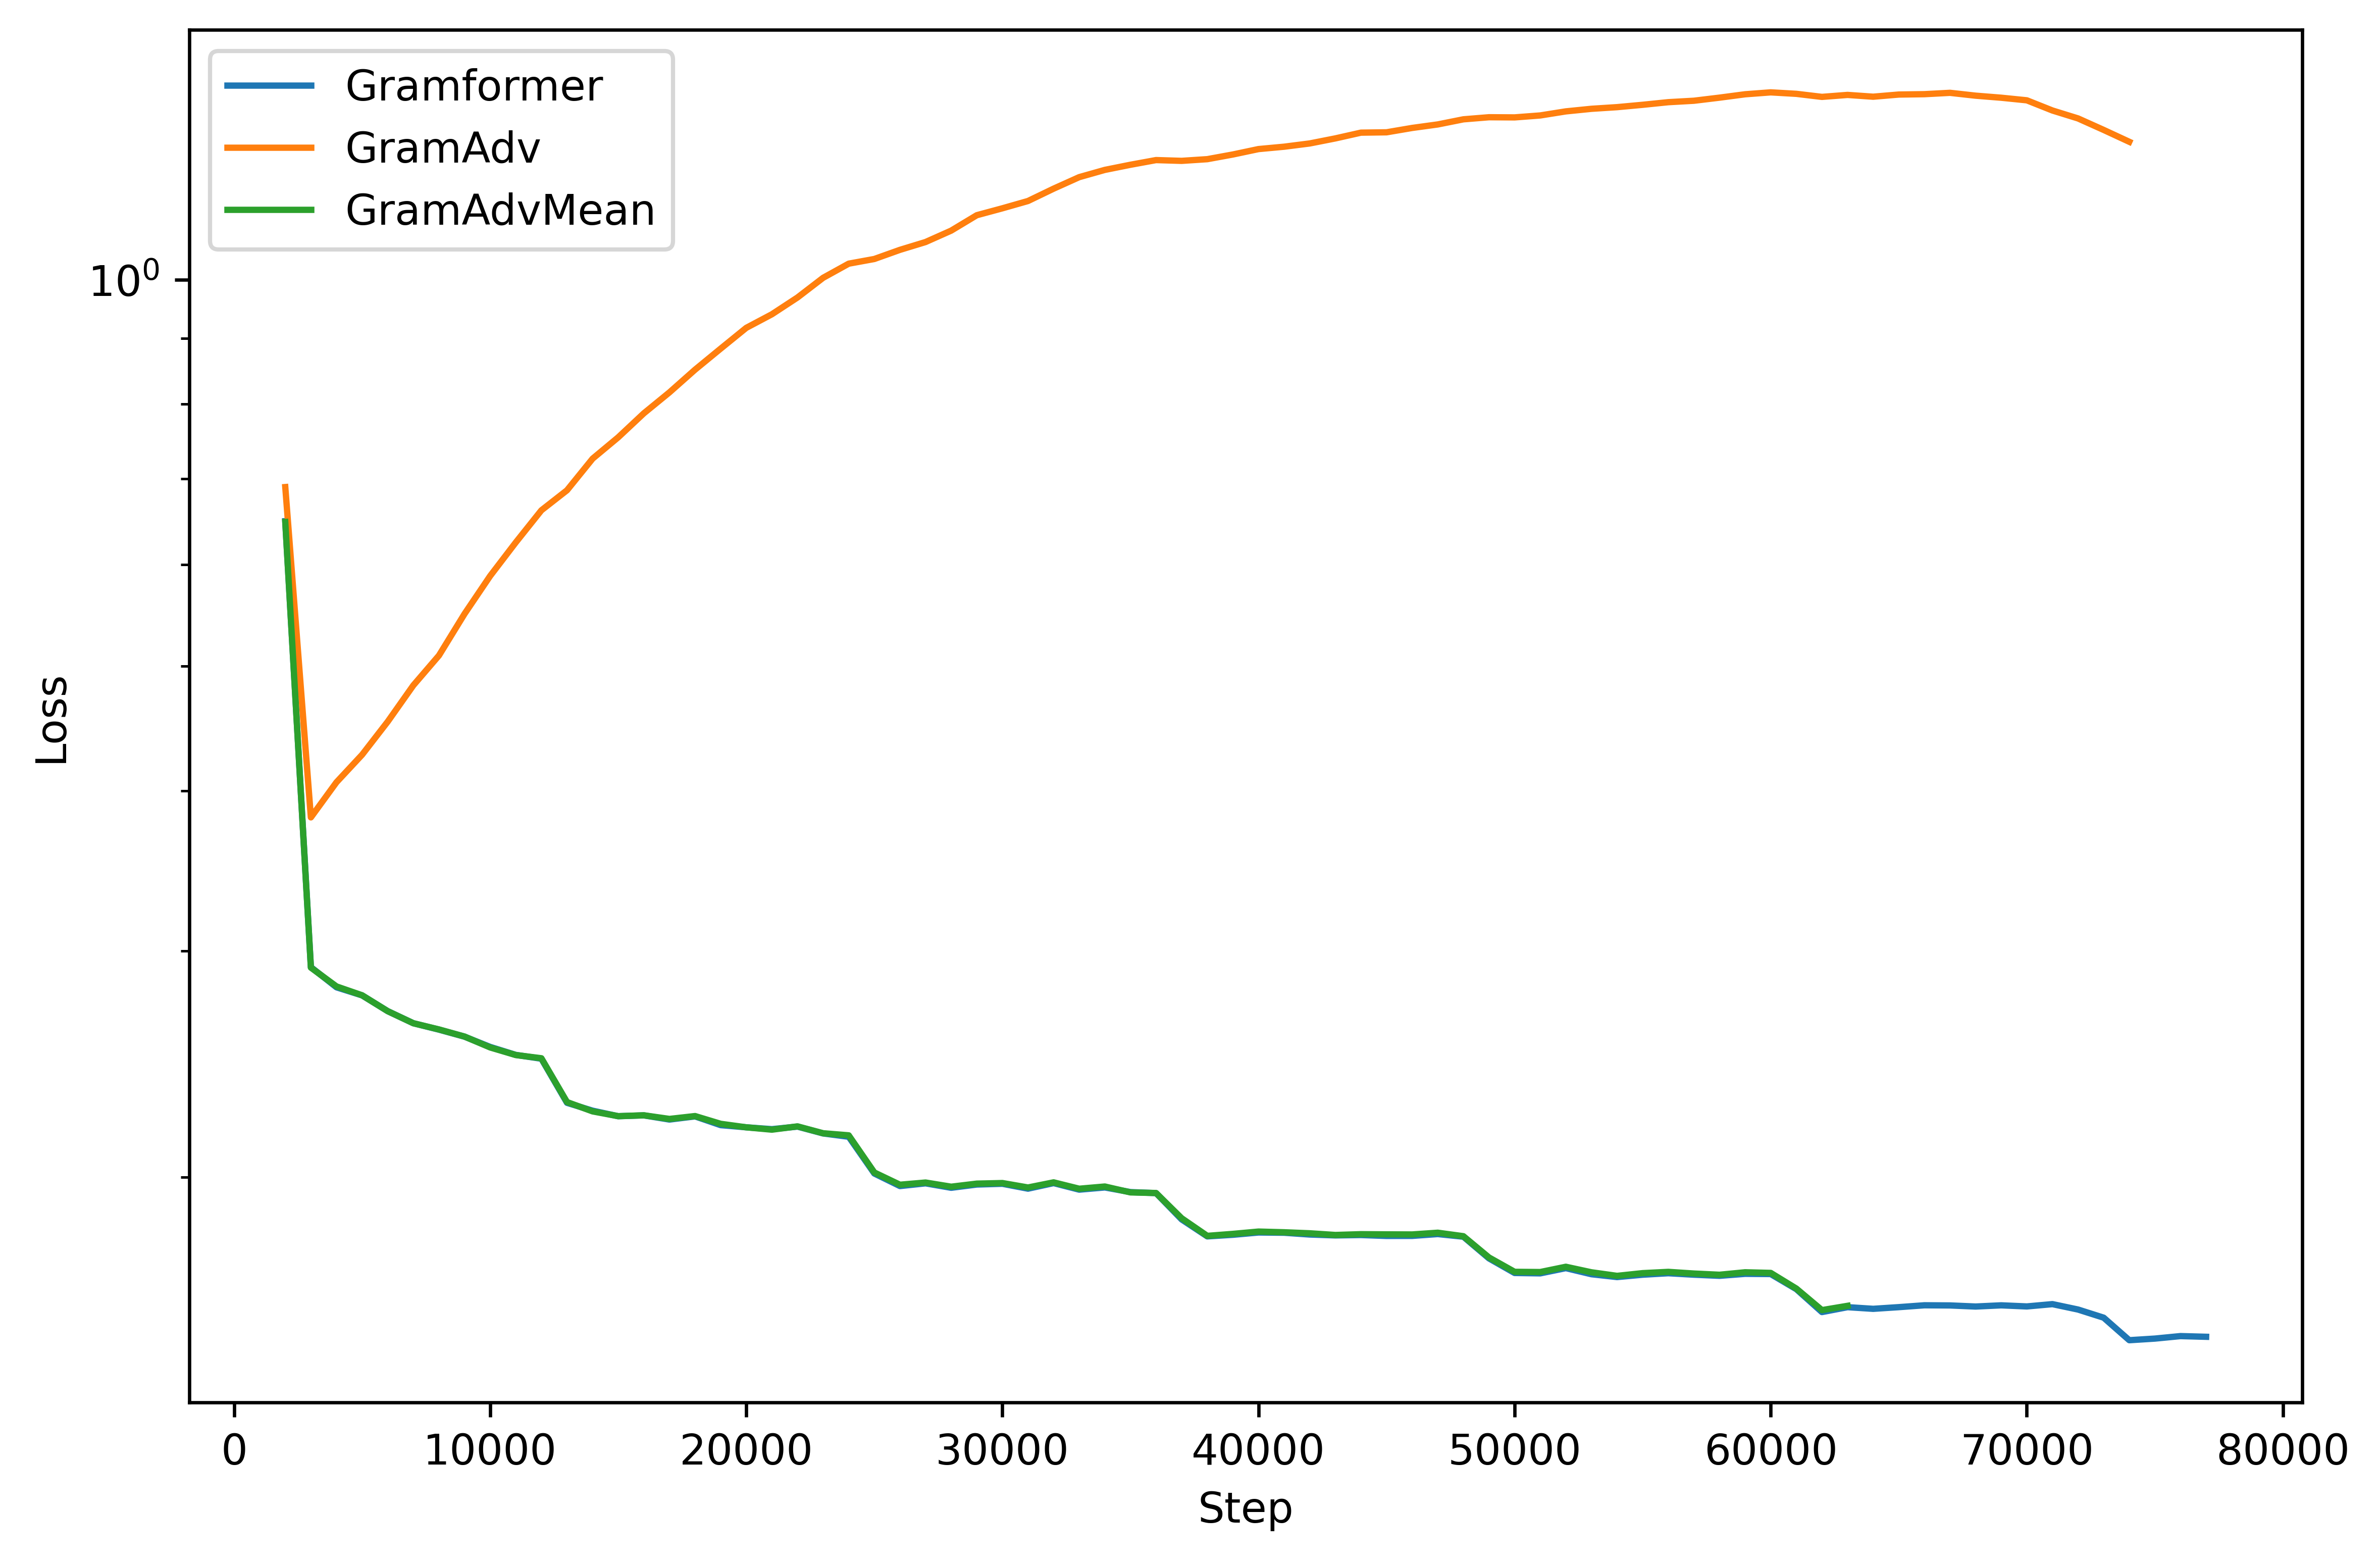

In [72]:
fig, ax = plt.subplots(dpi=600,figsize=(9,6))
ax.plot(out_former['Step'], out_former['Value'],label='Gramformer') # 作y1 = x 图，并标记此线名为linear
ax.plot(adv['Step'], adv['Value'],label='GramAdv') # 作y1 = x 图，并标记此线名为linear
ax.plot(mean['Step'], mean['Value'], label='GramAdvMean') # 作y1 = x 图，并标记此线名为linear
plt.yscale('log')
ax.set_xlabel('Step') #设置x轴名称 x label
ax.set_ylabel('Loss') #设置y轴名称 y label
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.show() #图形可视化

# BLEU

In [47]:
import pandas as pd
import numpy as np
import os
def smooth(file_path, csv_path,weight=0.6):
    data = pd.read_csv(filepath_or_buffer=filePath+'/'+csv_path,header=0,names=['Step','Value'],dtype={'Step':np.int,'Value':np.float})
    scalar = data['Value'].values
    last = scalar[0]
    smoothed = []
    for point in scalar:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
 
 
    save = pd.DataFrame({'Step':data['Step'].values,'Value':smoothed})
    save.to_csv(filePath+'/'+'smooth_'+csv_path)
 
 
for i in [-2,0,2]:
    smooth(filePath,files[i])

/Users/yufanwang/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/Users/yufanwang/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and gui

In [73]:
out_former = pd.read_csv(filePath+'/smooth/smooth_'+files[-2])
out_former[['Step',"Value"]].head()

,Step,Value
0,5000,0.708573
1,10000,0.709965
2,15000,0.711172
3,20000,0.711875
4,25000,0.711871


In [74]:
adv = pd.read_csv(filePath+'/smooth/smooth_'+files[0])
adv["Value"] = adv["Value"]
adv[['Step',"Value"]].head()

,Step,Value
0,5000,0.704056
1,10000,0.706830
2,15000,0.708844
3,20000,0.710558
4,25000,0.710705


In [75]:
mean = pd.read_csv(filePath+'/smooth/smooth_'+files[2])
mean[['Step',"Value"]].head()

,Step,Value
0,5000,0.708649
1,10000,0.709854
2,15000,0.711344
3,20000,0.713060
4,25000,0.714223


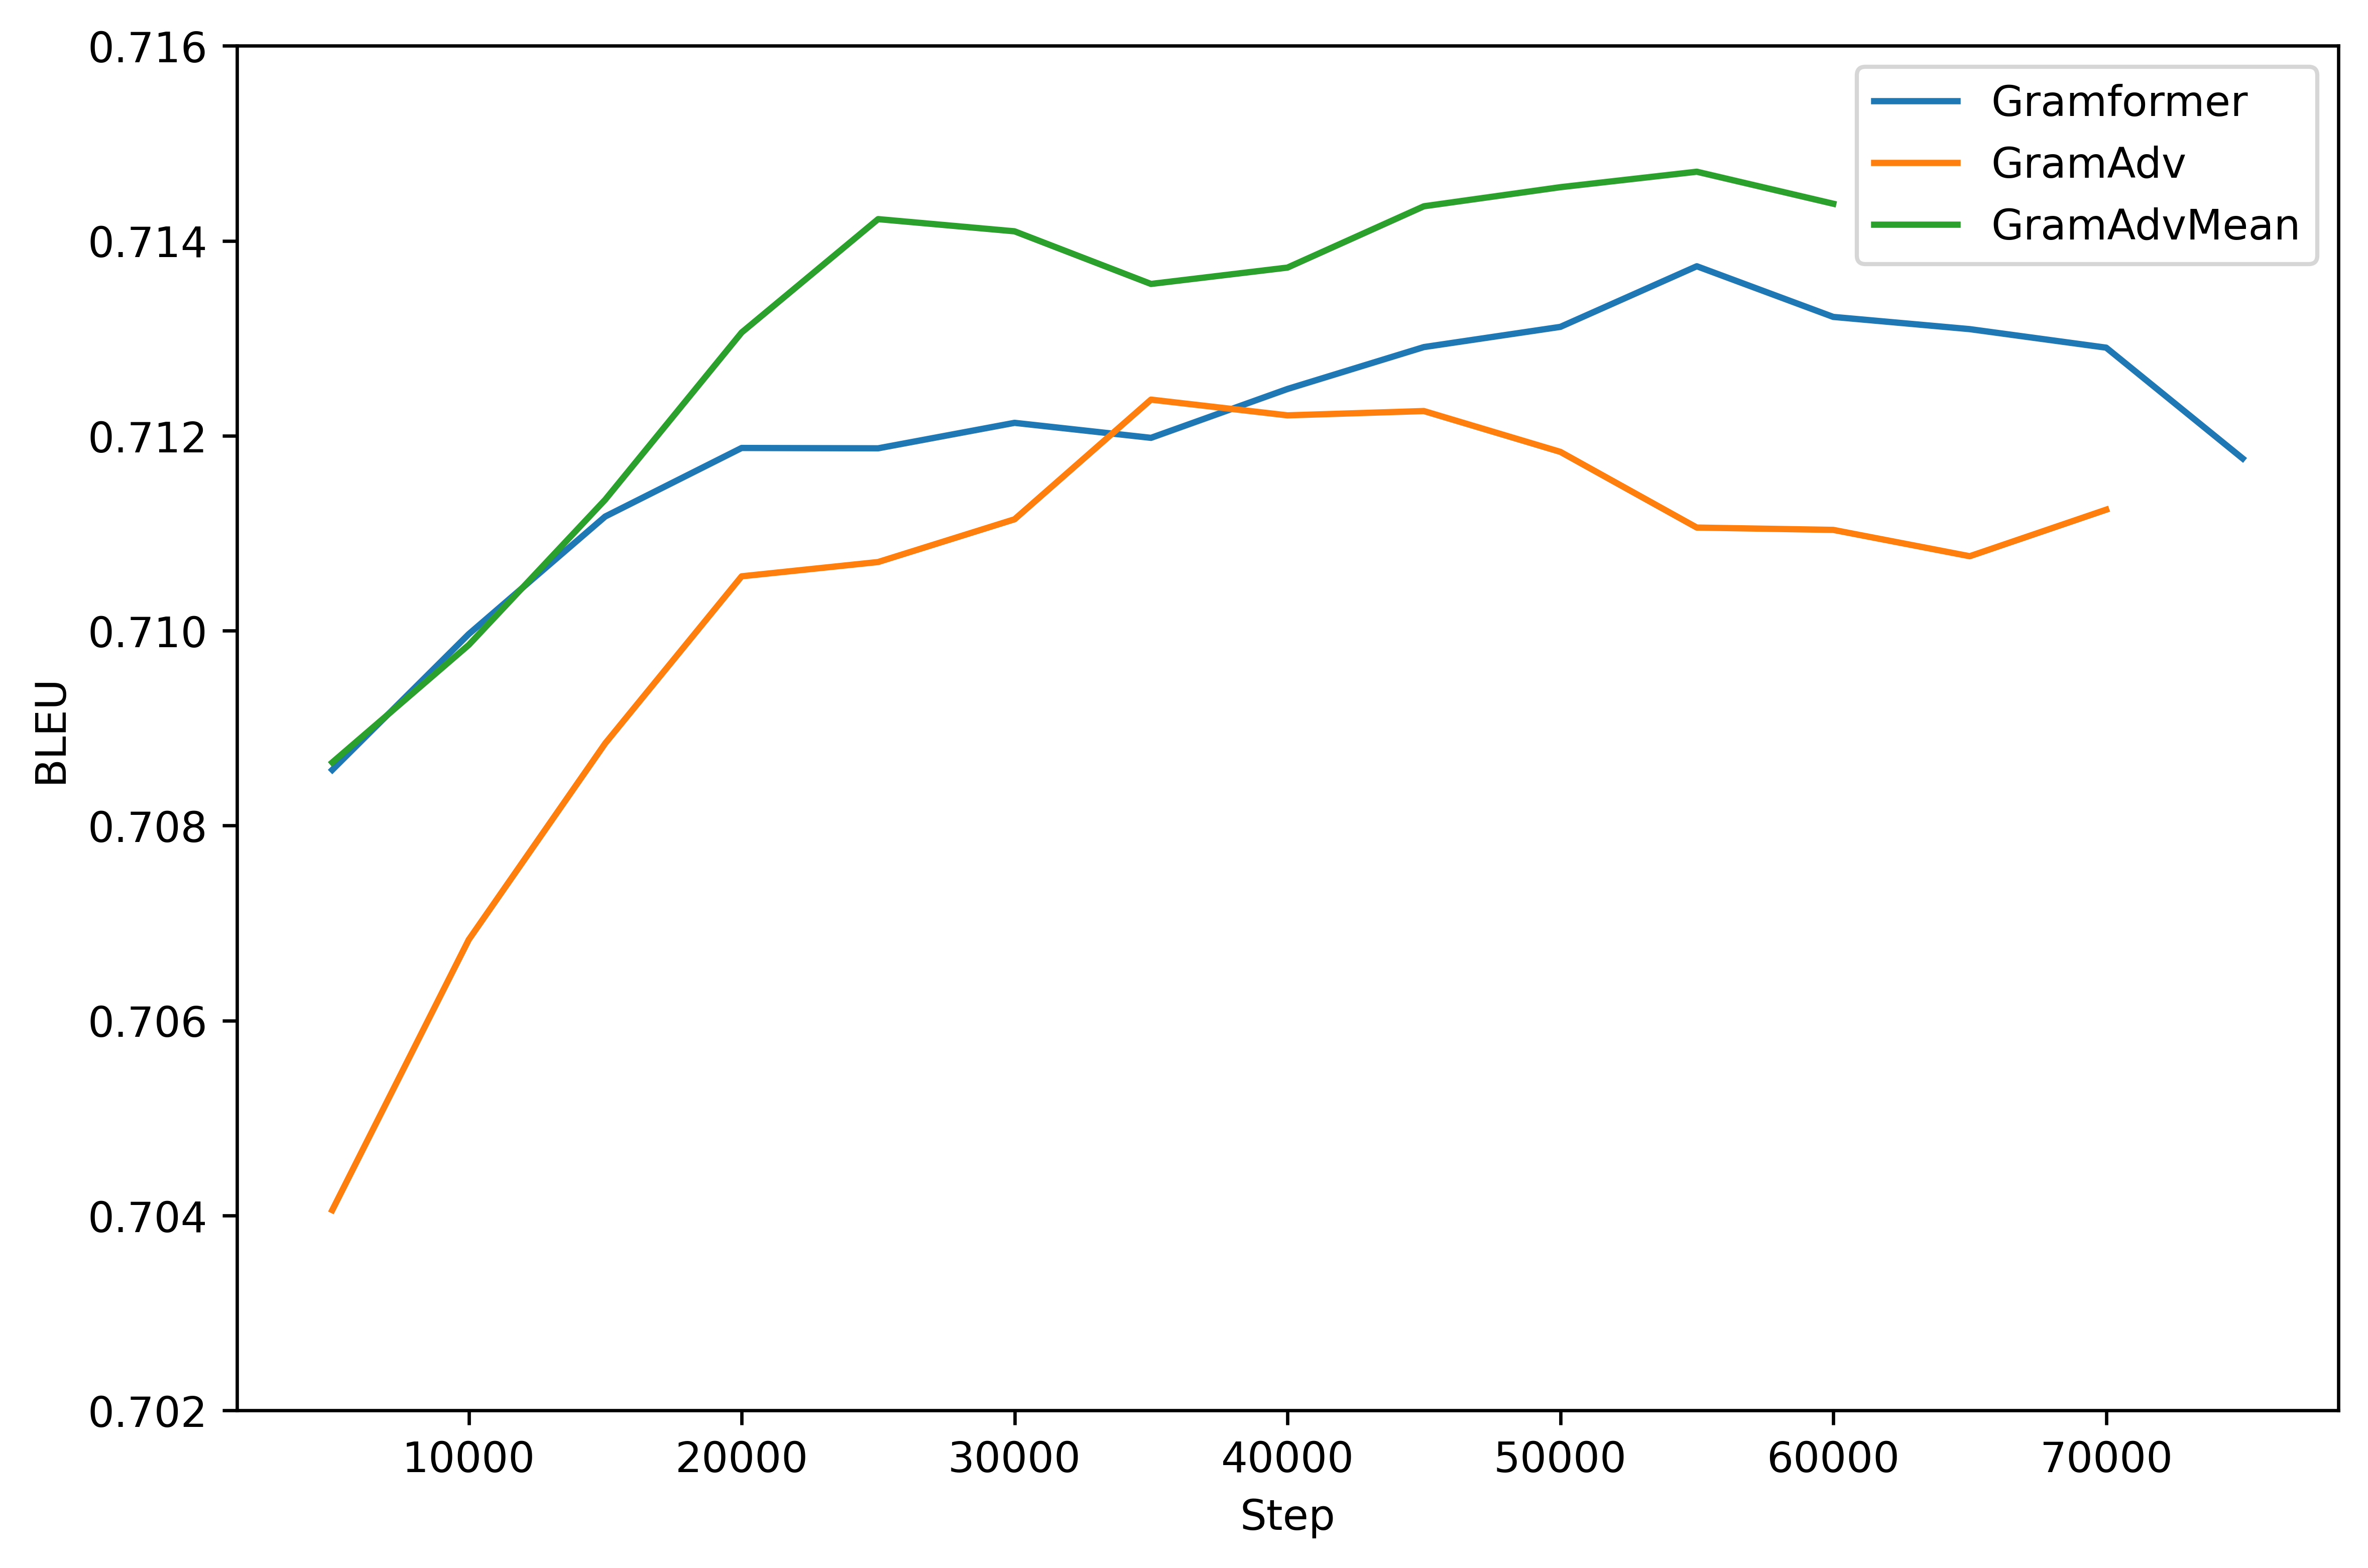

In [76]:
fig, ax = plt.subplots(dpi=600,figsize=(9,6))
ax.plot(out_former['Step'], out_former['Value'],label='Gramformer') # 作y1 = x 图，并标记此线名为linear
ax.plot(adv['Step'], adv['Value'],label='GramAdv') # 作y1 = x 图，并标记此线名为linear
ax.plot(mean['Step'], mean['Value'], label='GramAdvMean') # 作y1 = x 图，并标记此线名为linear
plt.ylim([0.702,0.716])
ax.set_xlabel('Step') #设置x轴名称 x label
ax.set_ylabel('BLEU') #设置y轴名称 y label
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.show() #图形可视化